In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Fermi Gas model

Analytical relations of energy density and pressure

In [2]:
epsilon = 1.42 * 10**24
x=np.linspace(0,2,20000)
E = ((2 * x**3 + x) * np.sqrt(1 + x**2) - np.arcsinh(x)) * (epsilon/8) + x**3*1.877e+27
P = ((2 * x**3 - 3 * x) * np.sqrt(1 + x**2) + 3 * np.arcsinh(x)) * (epsilon/24)

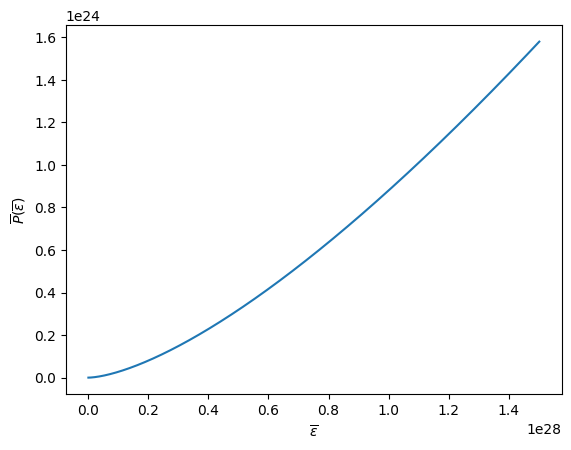

In [10]:
# Customize the plot
plt.ylabel('$\overline{P}(\overline{\epsilon})$')
plt.xlabel('$\overline{\epsilon}$')

# Customize ticks
'''custom_ticks_y = np.arange(1e+23, 2e+24, 5*(1e+23))  # Adjust as needed
custom_ticks_x = np.arange(1e+26, 1e+28, 10*(1e+26))  # Adjust as needed
plt.yticks(custom_ticks_y)'''

# Show the plot
plt.plot(E,P)
plt.show()


In [11]:
# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate example data
x_data = E
y_data = P

# Perform the power law fitting
params, _ = curve_fit(power_law, x_data, y_data, maxfev=10000)

# Extract the fitted parameters
a_fit, b_fit = params

# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)

# Generate fitted curve
P_fit = power_law(E, a_fit, b_fit)

Fitted Parameters:
a = 1.2966964355196458e-17
b = 1.4582080091307497


For smaller range of K_f, gamma is closer to 5/3 and for larger range, it is 4/3. Hence matching the relativisitc and non-relativistic polytropic euqation of states.

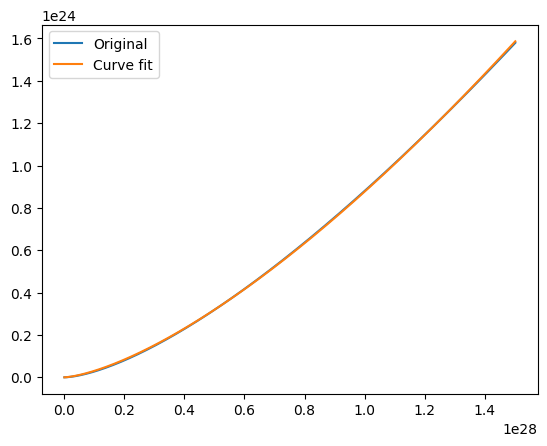

In [12]:
plt.plot(E,P, label="Original")
plt.plot(E,P_fit, label="Curve fit")
plt.legend()
plt.show()

The structure equations of polytropes

In [13]:
def runge_kutta_step(f, y, r, h, a, t, b):
    k1 = h * f(y, r, a, t, b)
    k2 = h * f(y + 0.5 * k1, r + 0.5 * h, a, t, b)
    k3 = h * f(y + 0.5 * k2, r + 0.5 * h, a, t, b)
    k4 = h * f(y + k3, r + h, a, t, b)
    
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

In [14]:
def system(y, r, a, t, b):
    P, M = y
    dPdr = -(a * np.exp(t * np.log(P)) * M) / (r**2)
    dMdr = b * r**2 * P**t
    return np.array([dPdr, dMdr])

Relativistic case 

In [27]:
# Define the constants
a_rel = 1.473  # Replace with your value
t_rel = 3/4  # Replace with your value
b_rel = 52.46  # Replace with your value

# Define the initial conditions
P_rel0 = 1e-16
M_rel0 = 0
y_rel0 = np.array([P_rel0, M_rel0])

# Initialize the reuired values
h = 1/2 # step size
r=1e-5 # choosing an arbitrarily small value of r to avoid illegal calculations
p=P_rel0 # Iterated pressure initialization
m=0 # Iterated mass initialization
i=0 # iteration

# Initialize arrays to store solutions
P_rel_sol = [P_rel0]
M_rel_sol = [M_rel0]
r_values   = [r]

# Perform Runge-Kutta integration
while p >= 0:
    r+=h;r_values.append(r)
    y_rel0 = runge_kutta_step(system, y_rel0, r_values[i], h, a_rel, t_rel, b_rel)
    p, m = y_rel0
    P_rel_sol.append(p); M_rel_sol.append(m) 
    i+=1
 
print(r_values[len(M_rel_sol)-2])
print(M_rel_sol[len(M_rel_sol)-2])


15690.50001
1.2469345589237657


/tmp/ipykernel_5484/458908315.py:3: RuntimeWarning: invalid value encountered in log
  dPdr = -(a * np.exp(t * np.log(P)) * M) / (r**2)
/tmp/ipykernel_5484/458908315.py:4: RuntimeWarning: invalid value encountered in double_scalars
  dMdr = b * r**2 * P**t


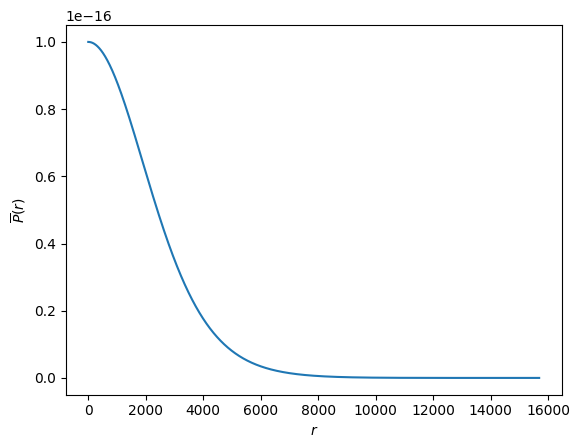

In [28]:
# Plot the results
plt.plot(r_values, P_rel_sol)
plt.xlabel('$r$')
plt.ylabel('$\overline {P}(r)$')
plt.show()

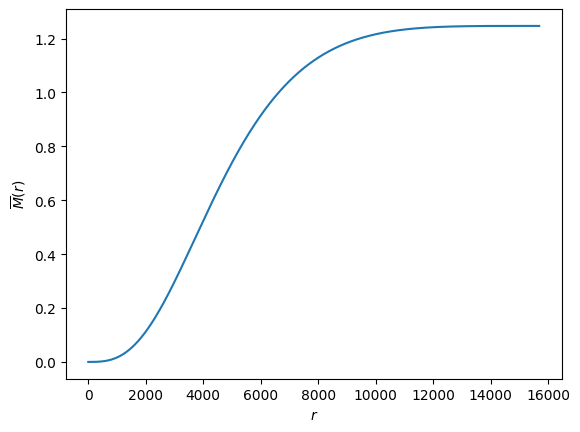

In [23]:
plt.plot(r_values, M_rel_sol)
plt.xlabel('$r$')
plt.ylabel('$\overline {M}(r)$')
plt.show()

Non-Relativistic case

In [29]:
# Define the constants
a_nrel = 0.05  # Replace with your value
t_nrel = 3/5  # Replace with your value
b_nrel = 0.005924  # Replace with your value

# Define the initial conditions
P_nrel0 = 1e-16
M_nrel0 = 0
y_nrel0 = np.array([P_nrel0, M_nrel0])

# Initialize the reuired values
h = 1 # step size
r=1e-25 # choosing an arbitrarily small value of r to avoid illegal calculations
p=P_nrel0 # Iterated pressure initialization
m=0 # Iterated mass initialization
i=0 # iteration

# Initialize arrays to store solutions
P_nrel_sol = [P_nrel0]
M_nrel_sol = [M_nrel0]
r_values   = [r]

# Perform Runge-Kutta integration
while p >= 0:
    r+=h;r_values.append(r)
    y_nrel0 = runge_kutta_step(system, y_nrel0, r_values[i], h, a_nrel, t_nrel, b_nrel)
    p, m = y_nrel0
    P_nrel_sol.append(p); M_nrel_sol.append(m) 
    i+=1
 
print(r_values[len(M_nrel_sol)-2])
print(M_nrel_sol[len(M_nrel_sol)-2])


13362.0
0.1975905380295502


/tmp/ipykernel_5484/458908315.py:3: RuntimeWarning: invalid value encountered in log
  dPdr = -(a * np.exp(t * np.log(P)) * M) / (r**2)
/tmp/ipykernel_5484/458908315.py:4: RuntimeWarning: invalid value encountered in double_scalars
  dMdr = b * r**2 * P**t


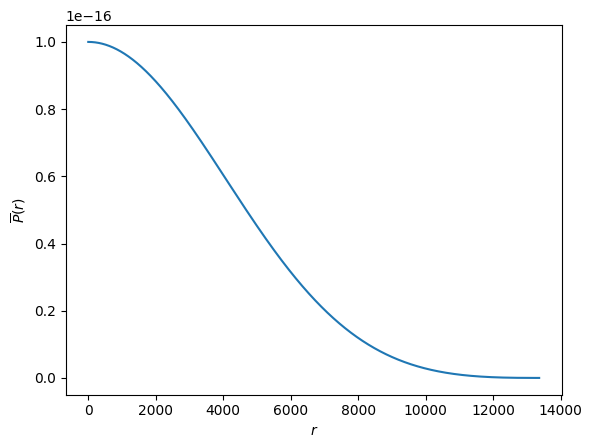

In [30]:
# Plot the results
plt.plot(r_values, P_nrel_sol)
plt.xlabel('$r$')
plt.ylabel('$\overline {P}(r)$')
plt.show()

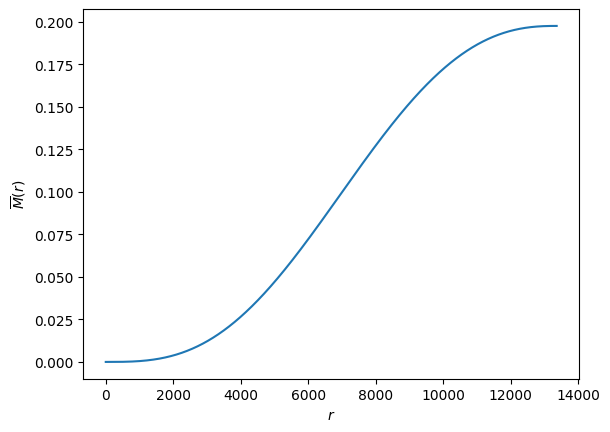

In [31]:
plt.plot(r_values, M_nrel_sol)
plt.xlabel('$r$')
plt.ylabel('$\overline {M}(r)$')
plt.show()